<a href="https://colab.research.google.com/github/Jaimon12/Student-Performance-Prediction-Using-Machine-Learning/blob/main/Student_Performance_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
)
import warnings
warnings.filterwarnings("ignore")
from xgboost import plot_importance


In [ ]:
# Step 2: Load Dataset
df = pd.read_csv("student_data.csv")

# Step 3: Create Target Variable (pass/fail based on G3)
df["pass_fail"] = (df["G3"] >= 10).astype(int)

# Drop grade columns to simulate early prediction
df.drop(["G1", "G2", "G3"], axis=1, inplace=True)

# Step 4: Encode Categorical Variables
categorical_cols = df.select_dtypes(include="object").columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
# Step 5: Train-Test Split
X = df.drop("pass_fail", axis=1)
y = df["pass_fail"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Step 6: Train Classifier Models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Step 7: Model Evaluation Function
def evaluate_model(model, X_test, y_test, model_name="Model"):
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds)
    cm = confusion_matrix(y_test, preds)

    print(f"===== {model_name} =====")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", report)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()


===== Logistic Regression =====
Accuracy: 0.6709
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.31      0.38        26
           1       0.71      0.85      0.78        53

    accuracy                           0.67        79
   macro avg       0.61      0.58      0.58        79
weighted avg       0.64      0.67      0.65        79



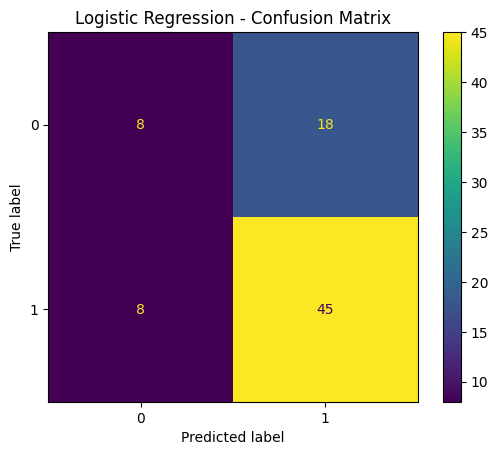

===== Random Forest =====
Accuracy: 0.6709
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.27      0.35        26
           1       0.71      0.87      0.78        53

    accuracy                           0.67        79
   macro avg       0.60      0.57      0.56        79
weighted avg       0.64      0.67      0.64        79



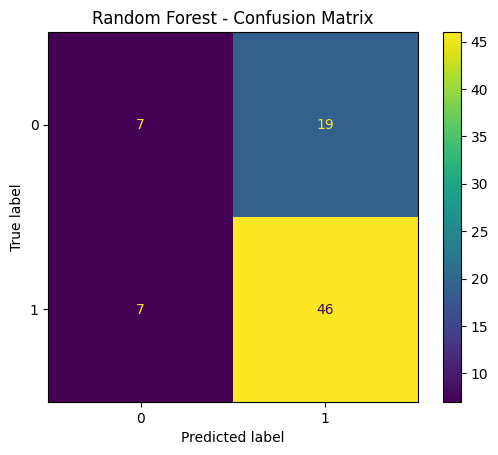

===== XGBoost =====
Accuracy: 0.6456
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.35      0.39        26
           1       0.71      0.79      0.75        53

    accuracy                           0.65        79
   macro avg       0.58      0.57      0.57        79
weighted avg       0.63      0.65      0.63        79



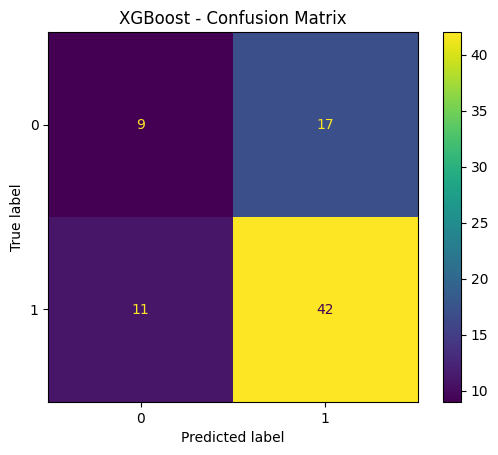

In [ ]:
# Step 8: Evaluate All Models
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
evaluate_model(rf, X_test, y_test, "Random Forest")
evaluate_model(xgb, X_test, y_test, "XGBoost")


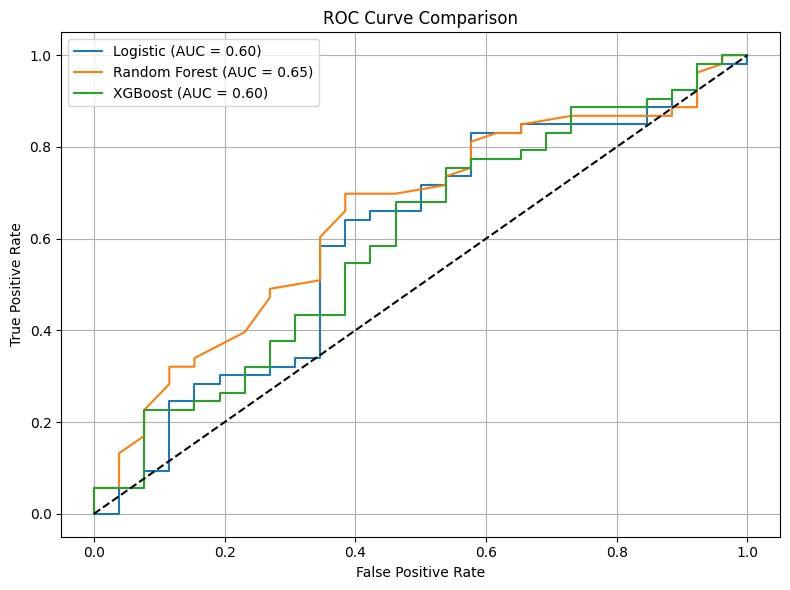

In [ ]:
# Step 9: ROC Curve Comparison
plt.figure(figsize=(8, 6))

for name, model in zip(["Logistic", "Random Forest", "XGBoost"], [log_reg, rf, xgb]):
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


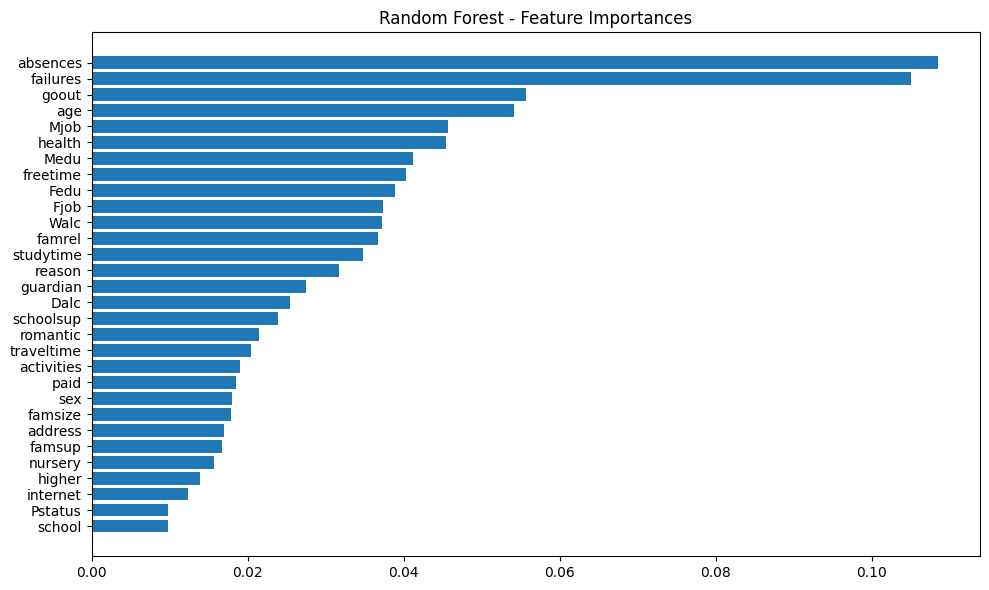

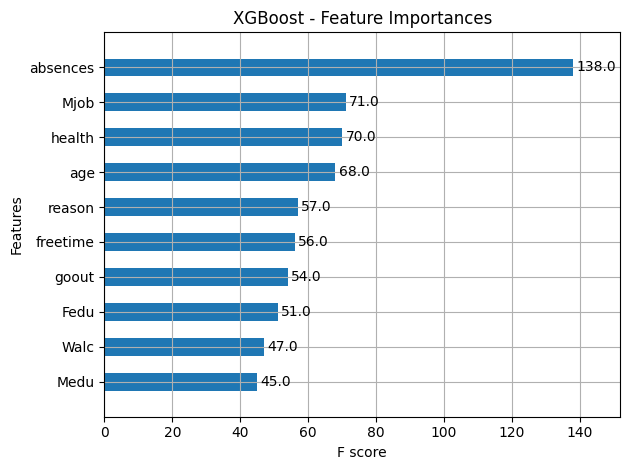

In [ ]:
# Step 10: Feature Importance Plots
# Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title("Random Forest - Feature Importances")
plt.tight_layout()
plt.show()

# XGBoost
plot_importance(xgb, max_num_features=10, height=0.5)
plt.title("XGBoost - Feature Importances")
plt.tight_layout()
plt.show()
